# EDA and clean dataset of toxic comments

In [118]:
# !pip install urlextract


In [119]:
# !pip install emojis


### import necessary libraries

In [120]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
# from urlextract import URLExtract
# import emojis


In [121]:
# !pip install nltk
# nltk.download('punkt')

In [122]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### load dataset

In [123]:
train = pd.read_csv("/content/drive/MyDrive/toxic comments classification/data/train.csv")
X_test = pd.read_csv("/content/drive/MyDrive/toxic comments classification/data/test.csv")
y_test = pd.read_csv("/content/drive/MyDrive/toxic comments classification/data/test_labels.csv")
sample = pd.read_csv("/content/drive/MyDrive/toxic comments classification/data/sample_submission.csv")

In [124]:
train = train.drop_duplicates()
X_test = X_test.drop_duplicates()
y_test = y_test.drop_duplicates()
sample = sample.drop_duplicates()

In [125]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             159571 non-null  object
 1   comment_text   159571 non-null  object
 2   toxic          159571 non-null  int64 
 3   severe_toxic   159571 non-null  int64 
 4   obscene        159571 non-null  int64 
 5   threat         159571 non-null  int64 
 6   insult         159571 non-null  int64 
 7   identity_hate  159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 11.0+ MB


In [126]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153164 entries, 0 to 153163
Data columns (total 2 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            153164 non-null  object
 1   comment_text  153164 non-null  object
dtypes: object(2)
memory usage: 3.5+ MB


In [127]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   id             153164 non-null  object
 1   toxic          153164 non-null  int64 
 2   severe_toxic   153164 non-null  int64 
 3   obscene        153164 non-null  int64 
 4   threat         153164 non-null  int64 
 5   insult         153164 non-null  int64 
 6   identity_hate  153164 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 9.3+ MB


In [128]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 153164 entries, 0 to 153163
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             153164 non-null  object 
 1   toxic          153164 non-null  float64
 2   severe_toxic   153164 non-null  float64
 3   obscene        153164 non-null  float64
 4   threat         153164 non-null  float64
 5   insult         153164 non-null  float64
 6   identity_hate  153164 non-null  float64
dtypes: float64(6), object(1)
memory usage: 9.3+ MB


In [129]:
train.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [130]:
X_test.head()


,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [131]:
y_test.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,-1,-1,-1,-1,-1,-1
1,0000247867823ef7,-1,-1,-1,-1,-1,-1
2,00013b17ad220c46,-1,-1,-1,-1,-1,-1
3,00017563c3f7919a,-1,-1,-1,-1,-1,-1
4,00017695ad8997eb,-1,-1,-1,-1,-1,-1


In [132]:
sample.head()

,id,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,0.5,0.5,0.5,0.5,0.5,0.5
1,0000247867823ef7,0.5,0.5,0.5,0.5,0.5,0.5
2,00013b17ad220c46,0.5,0.5,0.5,0.5,0.5,0.5
3,00017563c3f7919a,0.5,0.5,0.5,0.5,0.5,0.5
4,00017695ad8997eb,0.5,0.5,0.5,0.5,0.5,0.5


In [133]:
labels = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for label in labels:
    print(label)
    print(train[label].value_counts().to_string())     

toxic
0    144277
1     15294
severe_toxic
0    157976
1      1595
obscene
0    151122
1      8449
threat
0    159093
1       478
insult
0    151694
1      7877
identity_hate
0    158166
1      1405


In [134]:
print(f'{train.shape[1]} features and {train.shape[0]} records.')
labels = list(train.columns[2:])

print('labels are :')
for index, label in enumerate(labels):
  print(f'{index+1}. {label} ')


8 features and 159571 records.
labels are :
1. toxic 
2. severe_toxic 
3. obscene 
4. threat 
5. insult 
6. identity_hate 


### take rows with labels

In [135]:
targets = list(train.columns[2:])
train_targets = train[targets].copy()

In [136]:
train_targets.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 159571 entries, 0 to 159570
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   toxic          159571 non-null  int64
 1   severe_toxic   159571 non-null  int64
 2   obscene        159571 non-null  int64
 3   threat         159571 non-null  int64
 4   insult         159571 non-null  int64
 5   identity_hate  159571 non-null  int64
dtypes: int64(6)
memory usage: 8.5 MB


In [137]:
train_targets

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
...,...,...,...,...,...,...
159566,0,0,0,0,0,0
159567,0,0,0,0,0,0
159568,0,0,0,0,0,0
159569,0,0,0,0,0,0


In [138]:
train_targets.sum(axis=1) 

0         0
1         0
2         0
3         0
4         0
         ..
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

### find sum of each row if it is more than 0 it's toxic

In [139]:
# How many rows are toxic? 
toxic_rows = train_targets.sum(axis=1)
toxic_rows = (toxic_rows > 0)

### add extra column 

In [140]:
# Create overall any_label feature
targets.append('any_label')
train_targets['any_label'] = toxic_rows

In [141]:
count_dic = {}
for comment_type in targets:
    counts = list()
    others = list(targets)
    train_selection = train_targets[(train_targets[comment_type]==1)]
    others.remove(comment_type)
    counts.append(('total', len(train_selection)))
    for other in others:
        counts.append((other, train_selection[other].sum()))
    count_dic[comment_type] = counts

del(train_selection)

In [142]:
def heatmap(df, title):
    plt.figure('heatmap', figsize=[7,7])
    plt.title(title)
    df_corr = df.corr()
    #df_corr = np.triu(df_corr, k=1)
    sns.heatmap(df_corr, vmax=0.6, square=True, annot=True, cmap='Greens')
    # plt.yticks(rotation = 45)
    # plt.xticks(rotation = 45)
    plt.show()

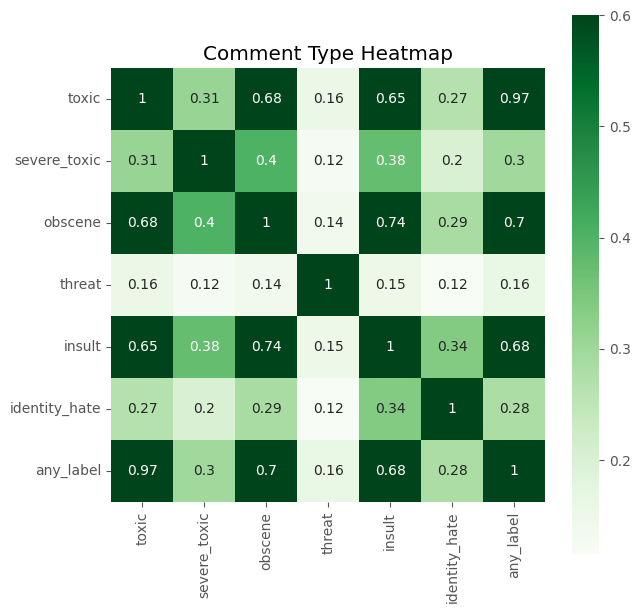

In [143]:
heatmap(train_targets, 'Comment Type Heatmap')


In [144]:
print('Training Data Comment Breakdown')
print('=====\n')

Training Data Comment Breakdown
=====



In [145]:
print('%d out of %d comments, or %.2f%%, are classified as toxic.' % 
     (np.sum(toxic_rows), len(train), (np.sum(toxic_rows)/len(train))*100))

16225 out of 159571 comments, or 10.17%, are classified as toxic.


In [146]:
totals = []
for key, value in count_dic.items():
    totals.append(value[0][1])
    print('\n%d %s comments. (%.2f%% of all data.)' % (value[0][1], key, (value[0][1]/len(train))*100))
    for cnt in value[1:]:
        print('- %d or %.2f%% were also %s.' % (cnt[1], (cnt[1]/value[0][1])*100, cnt[0]))
    



15294 toxic comments. (9.58% of all data.)
- 1595 or 10.43% were also severe_toxic.
- 7926 or 51.82% were also obscene.
- 449 or 2.94% were also threat.
- 7344 or 48.02% were also insult.
- 1302 or 8.51% were also identity_hate.
- 15294 or 100.00% were also any_label.

1595 severe_toxic comments. (1.00% of all data.)
- 1595 or 100.00% were also toxic.
- 1517 or 95.11% were also obscene.
- 112 or 7.02% were also threat.
- 1371 or 85.96% were also insult.
- 313 or 19.62% were also identity_hate.
- 1595 or 100.00% were also any_label.

8449 obscene comments. (5.29% of all data.)
- 7926 or 93.81% were also toxic.
- 1517 or 17.95% were also severe_toxic.
- 301 or 3.56% were also threat.
- 6155 or 72.85% were also insult.
- 1032 or 12.21% were also identity_hate.
- 8449 or 100.00% were also any_label.

478 threat comments. (0.30% of all data.)
- 449 or 93.93% were also toxic.
- 112 or 23.43% were also severe_toxic.
- 301 or 62.97% were also obscene.
- 307 or 64.23% were also insult.
- 98 or

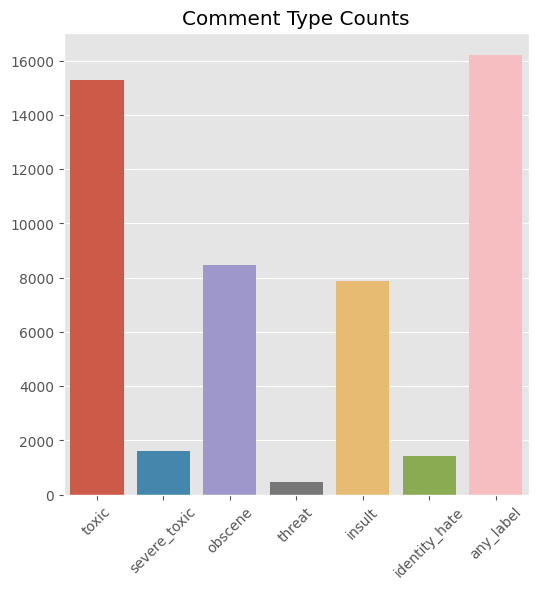

In [147]:
plt.style.use('ggplot')
plt.figure('Comment Type Counts', figsize=[6,6])
plt.title('Comment Type Counts')
sns.barplot(x=list(count_dic.keys()), y=totals)
plt.xticks(rotation = 45)
plt.show()

In [148]:
for t in targets:
    print("Label: %s ============================================================" % t)
    b = np.where(train_targets[t]==1)[0]
    selection = np.random.choice(b, 10)
    for s in selection:
        print(train.comment_text.loc[s])
        print("++++++++++++")
    print()
    
b = np.where(train_targets.any_label==0)[0]
selection = np.random.choice(b, 10)
print("Clean comments =========================================")
for s in selection:
    print(train.comment_text.loc[s])
    print("++++++++++++")

Label: toxic ============================================================
"

Who gives a rat's ass what either Korea or Japan think about an English naming convention?  Last I checked neither nation is comprised of native English speakers and they don't get a vote in what native English-speaking nations decide to call this body of water, IN ENGLISH.  We can call it the ""Sea of Jello"" and there isn't a damned thing they can do about it, other than whine like babies.  Perhaps in commemoration of this foolishness we should call it the ""Sea of Idiots"" and have done with it."
++++++++++++
Frustrated?

I believe frustrated would be an understatement.  Since I am unable to attack you, which I would never do of course, I will instead point to your senseless and idiotic contributions to the IMPACT- Charlottesville deletion discussion board.
++++++++++++
"

 This is your last warning. If you continue to make personal attacks, you will be blocked for disruption.  

""This is your last warning

In [149]:
train['length'] = train.comment_text.apply(lambda x: len(x))
print("Average toxic comment length: %d" % int(np.mean(train[(train_targets.any_label==1)].length)))
print("Average clean comment length: %d" % int(np.mean(train[(train_targets.any_label==0)].length)))

Average toxic comment length: 303
Average clean comment length: 404


In [150]:
print("Median toxic comment length: %d" % int(np.median(train[(train_targets.any_label==1)].length)))
print("Median clean comment length: %d" % int(np.median(train[(train_targets.any_label==0)].length)))

Median toxic comment length: 128
Median clean comment length: 216


In [151]:
def pct_caps(s):
    return sum([1 for c in s if c.isupper()]) / (sum(([1 for c in s if c.isalpha()])) + 1)
train['caps'] = train.comment_text.apply(lambda x: pct_caps(x))
print("Percent of capitalized characters in toxic comments: %d%%" % int(100 * np.mean(train[(train_targets.any_label==1)].caps)))
print("Percent of capitalized characters in clean comments: %d%%" % int(100 * np.mean(train[(train_targets.any_label==0)].caps)))

Percent of capitalized characters in toxic comments: 14%
Percent of capitalized characters in clean comments: 5%


In [152]:
def word_length(s):
    s = s.split(' ')
    return np.mean([len(w) for w in s if w.isalpha()])
train['word_length'] = train.comment_text.apply(lambda x: word_length(x))

print("Average word length in toxic comments: %.1f" % np.mean(train[(train_targets.any_label==1)].word_length))
print("Average word length in clean comments: %.1f" % np.mean(train[(train_targets.any_label==0)].word_length))

/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,


Average word length in toxic comments: 4.1
Average word length in clean comments: 4.4


In [153]:
train['exclamation'] = train.comment_text.apply(lambda s: len([c for c in s if c == '!']))
print("Exclamations in toxic comments: %.1f" % np.mean(train[(train_targets.any_label==1)].exclamation))
print("Exclamations in clean comments: %.1f" % np.mean(train[(train_targets.any_label==0)].exclamation))

Exclamations in toxic comments: 3.5
Exclamations in clean comments: 0.3


In [154]:
train['question'] = train.comment_text.apply(lambda s: len([c for c in s if c == '?']))
print("Question marks in toxic comments: %.1f" % np.mean(train[(train_targets.any_label==1)].question))
print("Question marks in clean comments: %.1f" % np.mean(train[(train_targets.any_label==0)].question))

Question marks in toxic comments: 0.6
Question marks in clean comments: 0.4


In [155]:
import re
ip = re.compile('(([2][5][0-5]\.)|([2][0-4][0-9]\.)|([0-1]?[0-9]?[0-9]\.)){3}'
                +'(([2][5][0-5])|([2][0-4][0-9])|([0-1]?[0-9]?[0-9]))')
def strip_ip(s, ip):
    try:
        found = ip.search(s)
        return s.replace(found.group(), ' ')
    except:
        return s
    
train.comment_text = train.comment_text.apply(lambda x: strip_ip(x, ip))

Label overlap summary.
1 label: 39.2%
2 labels: 21.4%
3 labels: 25.9%
4 labels: 10.8%
5 labels: 2.4%
6 labels: 0.2%


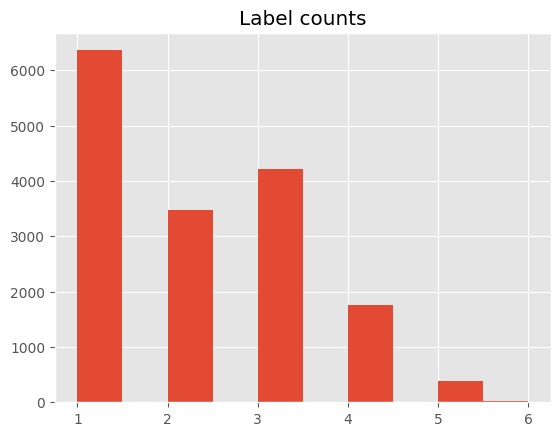

In [156]:
target_sums = np.sum(train_targets[train_targets.columns[:-1]], axis=1)
target_sums = target_sums[(train_targets.any_label==1)]
plt.figure('Label counts')
plt.title('Label counts')
plt.hist(target_sums)
print("Label overlap summary.")
for i in range(1,7):
    print('%d label%s: %.1f%%' % (i, 's' if i > 1 else '', 100 * len([s for s in target_sums if s == i])/len(target_sums)))

### Split Labels from Training Data

In [157]:
print('Training labels:')
print(list(train_targets.columns))
print(train_targets.shape)

print('\nTraining data')
train.drop(list(train_targets.columns[:-1]), inplace=True, axis=1)
train.drop('id', inplace=True, axis=1)
print(list(train.columns))
print(train.shape)

Training labels:
['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate', 'any_label']
(159571, 7)

Training data
['comment_text', 'length', 'caps', 'word_length', 'exclamation', 'question']
(159571, 6)


## Natural Language Processing
### Tokenized Sequences for Visualization

In [158]:
from keras.preprocessing.text import Tokenizer, text_to_word_sequence
from nltk.corpus import stopwords
import string

top_words = 5000
tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True, num_words=top_words)
tokenizer.fit_on_texts(train['comment_text'])

In [166]:
!pip install nltk
nltk.download('stopwords')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [159]:
train['comment_sequence'] = tokenizer.texts_to_sequences(train.comment_text.str.lower())


In [160]:
# Random comment
str(train.comment_sequence[890])

'[1, 19, 641, 23, 1, 22, 856, 43, 19, 48, 2035, 2, 10, 13, 121, 126, 8, 201, 10, 412, 975, 1127, 17, 10, 10, 13, 8, 1, 1630, 856, 55, 95, 602, 39, 6, 125, 62, 2035, 981, 2379, 14, 969, 4, 3610, 17, 316, 17, 3, 72, 1, 531, 45, 1039, 2221, 641, 23, 62, 1907, 5, 4220, 319, 43, 8, 14, 97, 1, 1353, 4, 32, 842, 36, 42, 1813, 1493, 27, 13, 190, 18, 15, 1, 856, 24, 6, 95, 521, 43, 19, 2379, 39, 1, 2408, 4, 33, 1011, 2523, 2, 11, 2177, 319, 319]'

### Analyze Max Len, Choose Appropriate 'max_len'

In [161]:
max_len = train.comment_sequence.map(lambda x: len(x)).max()
print("Max comment length is %d." % max_len)

Max comment length is 1399.


In [162]:
seq_lens = train.comment_sequence.map(lambda x: len(x))


In [163]:
for i in [10, 50, 100, 200, 300, 400, 500, 1000, 1200]:
    select = (seq_lens > i)
    print('%.2f%% of comments have more than %d words.' % ((np.sum(select)/len(seq_lens))*100, i))

83.34% of comments have more than 10 words.
35.22% of comments have more than 50 words.
16.06% of comments have more than 100 words.
5.61% of comments have more than 200 words.
2.62% of comments have more than 300 words.
1.63% of comments have more than 400 words.
1.08% of comments have more than 500 words.
0.02% of comments have more than 1000 words.
0.01% of comments have more than 1200 words.


### Visualize Word Counts

In [164]:
def get_word_cnt(tokenizer):
    word_cnt = [(k, v) for k, v in zip(tokenizer.word_counts.keys(), 
                                       tokenizer.word_counts.values())]
    word_cnt.sort(key = lambda tup: tup[1], reverse=True)
    stopWords = set(stopwords.words('english'))
    word_cnt = [tup for tup in word_cnt if tup[0] not in stopWords]
    return word_cnt

def word_plot(word_cnt, num_words, title):
    plt.figure(title, figsize=(24, 12))
    plt.suptitle(title, fontsize=40)
    sns.barplot(x= [tup[0] for tup in word_cnt[0:num_words]], 
                y = [tup[1] for tup in word_cnt[0:num_words]])
    plt.yticks(fontsize=20)
    plt.xticks(fontsize=20, rotation=35, ha='right')
    plt.show()

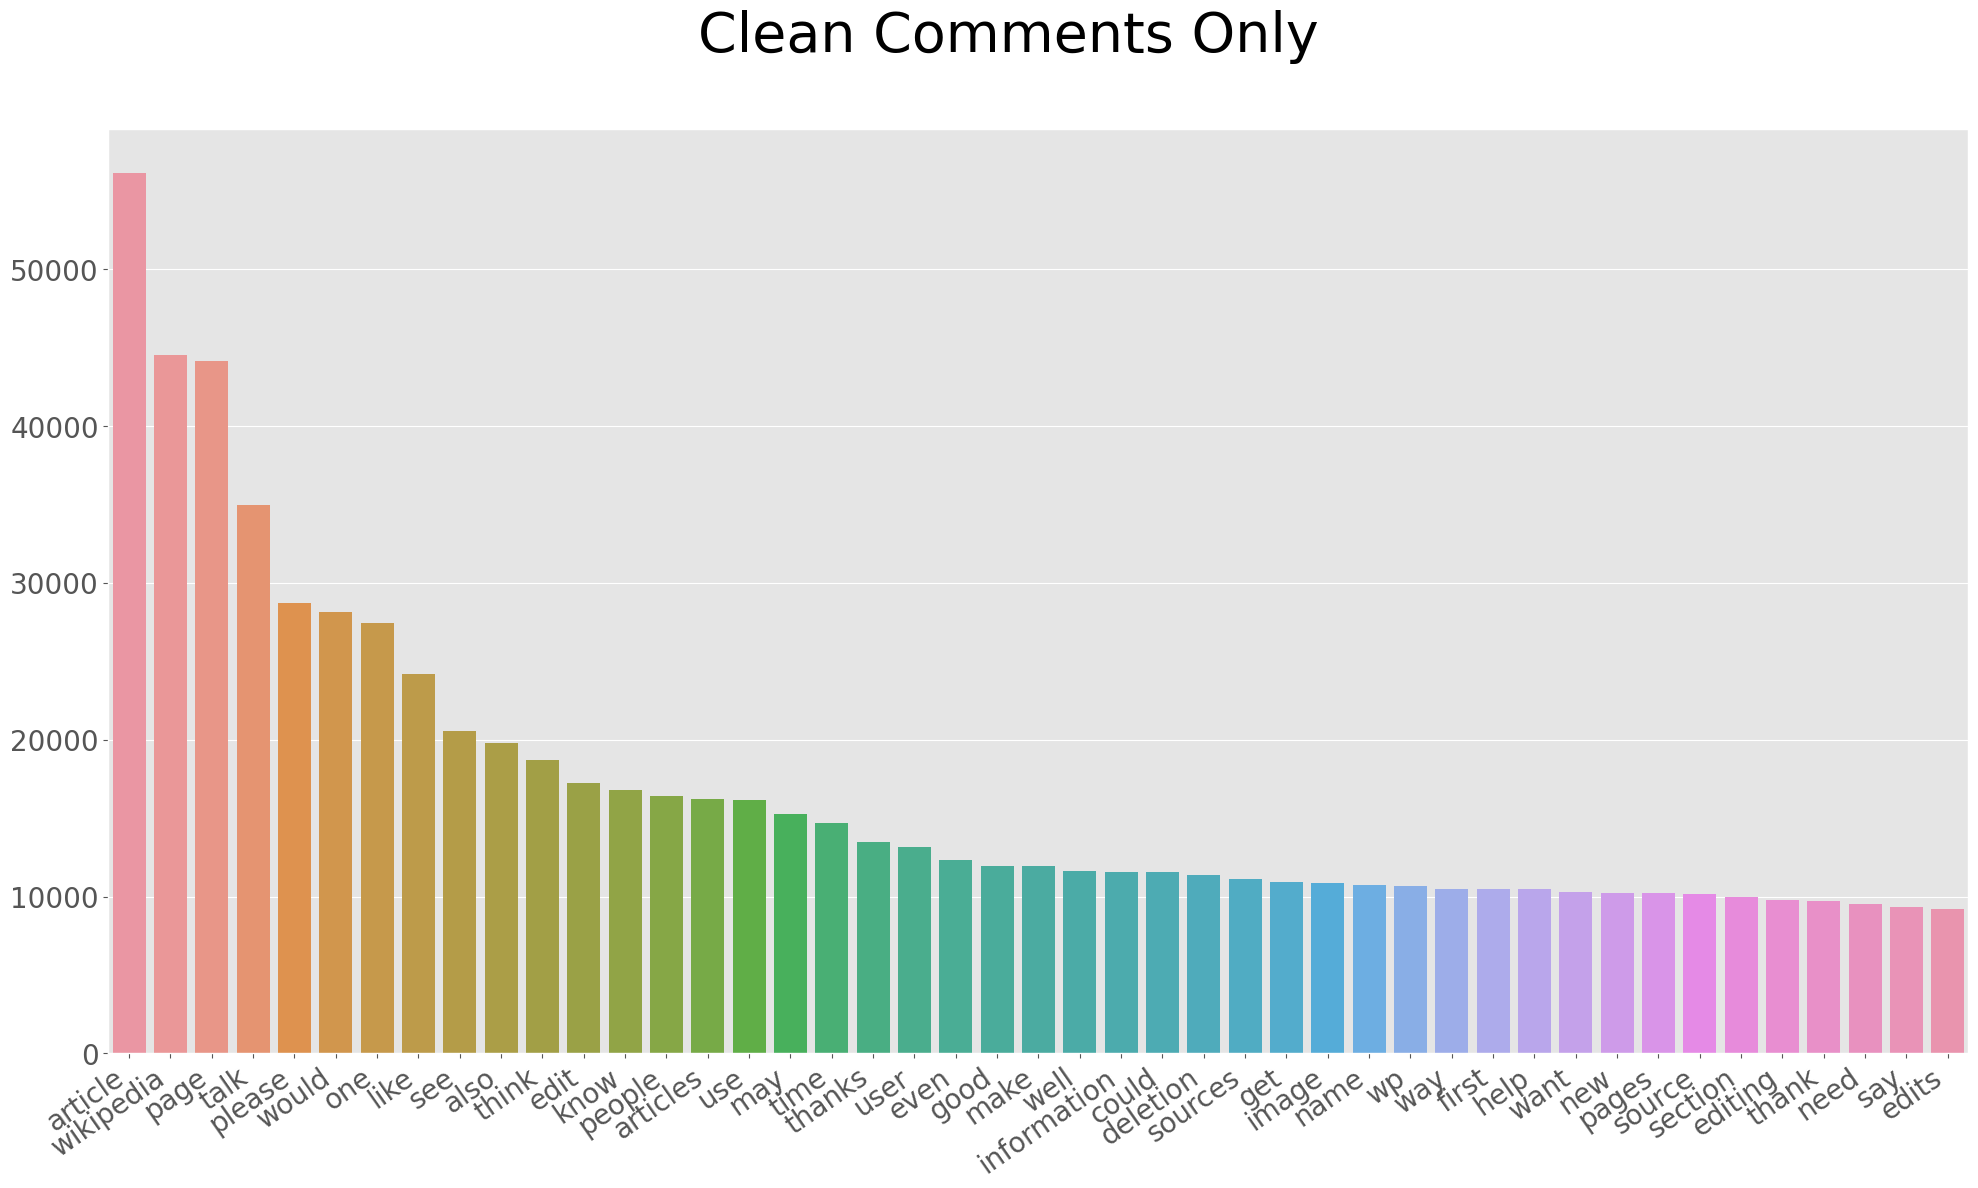

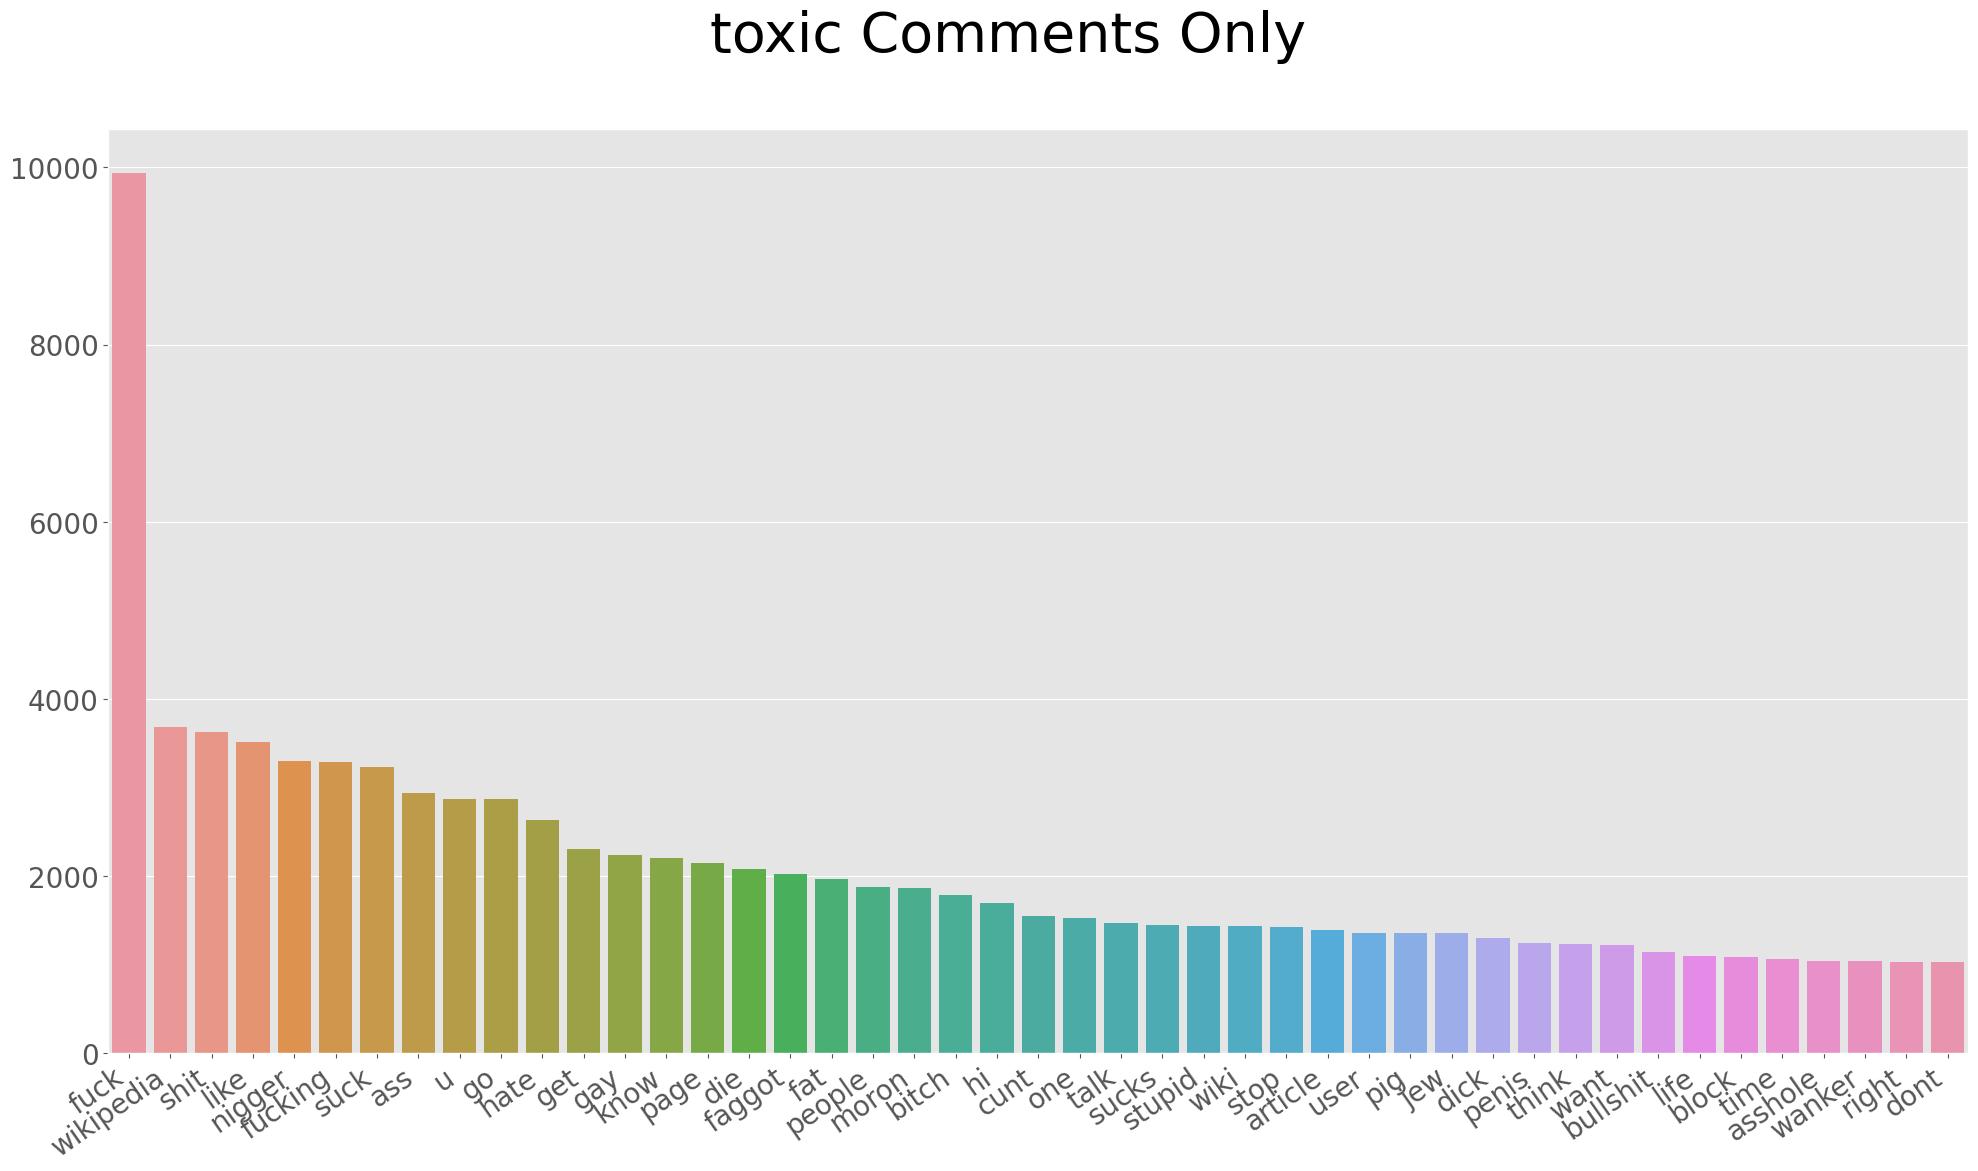

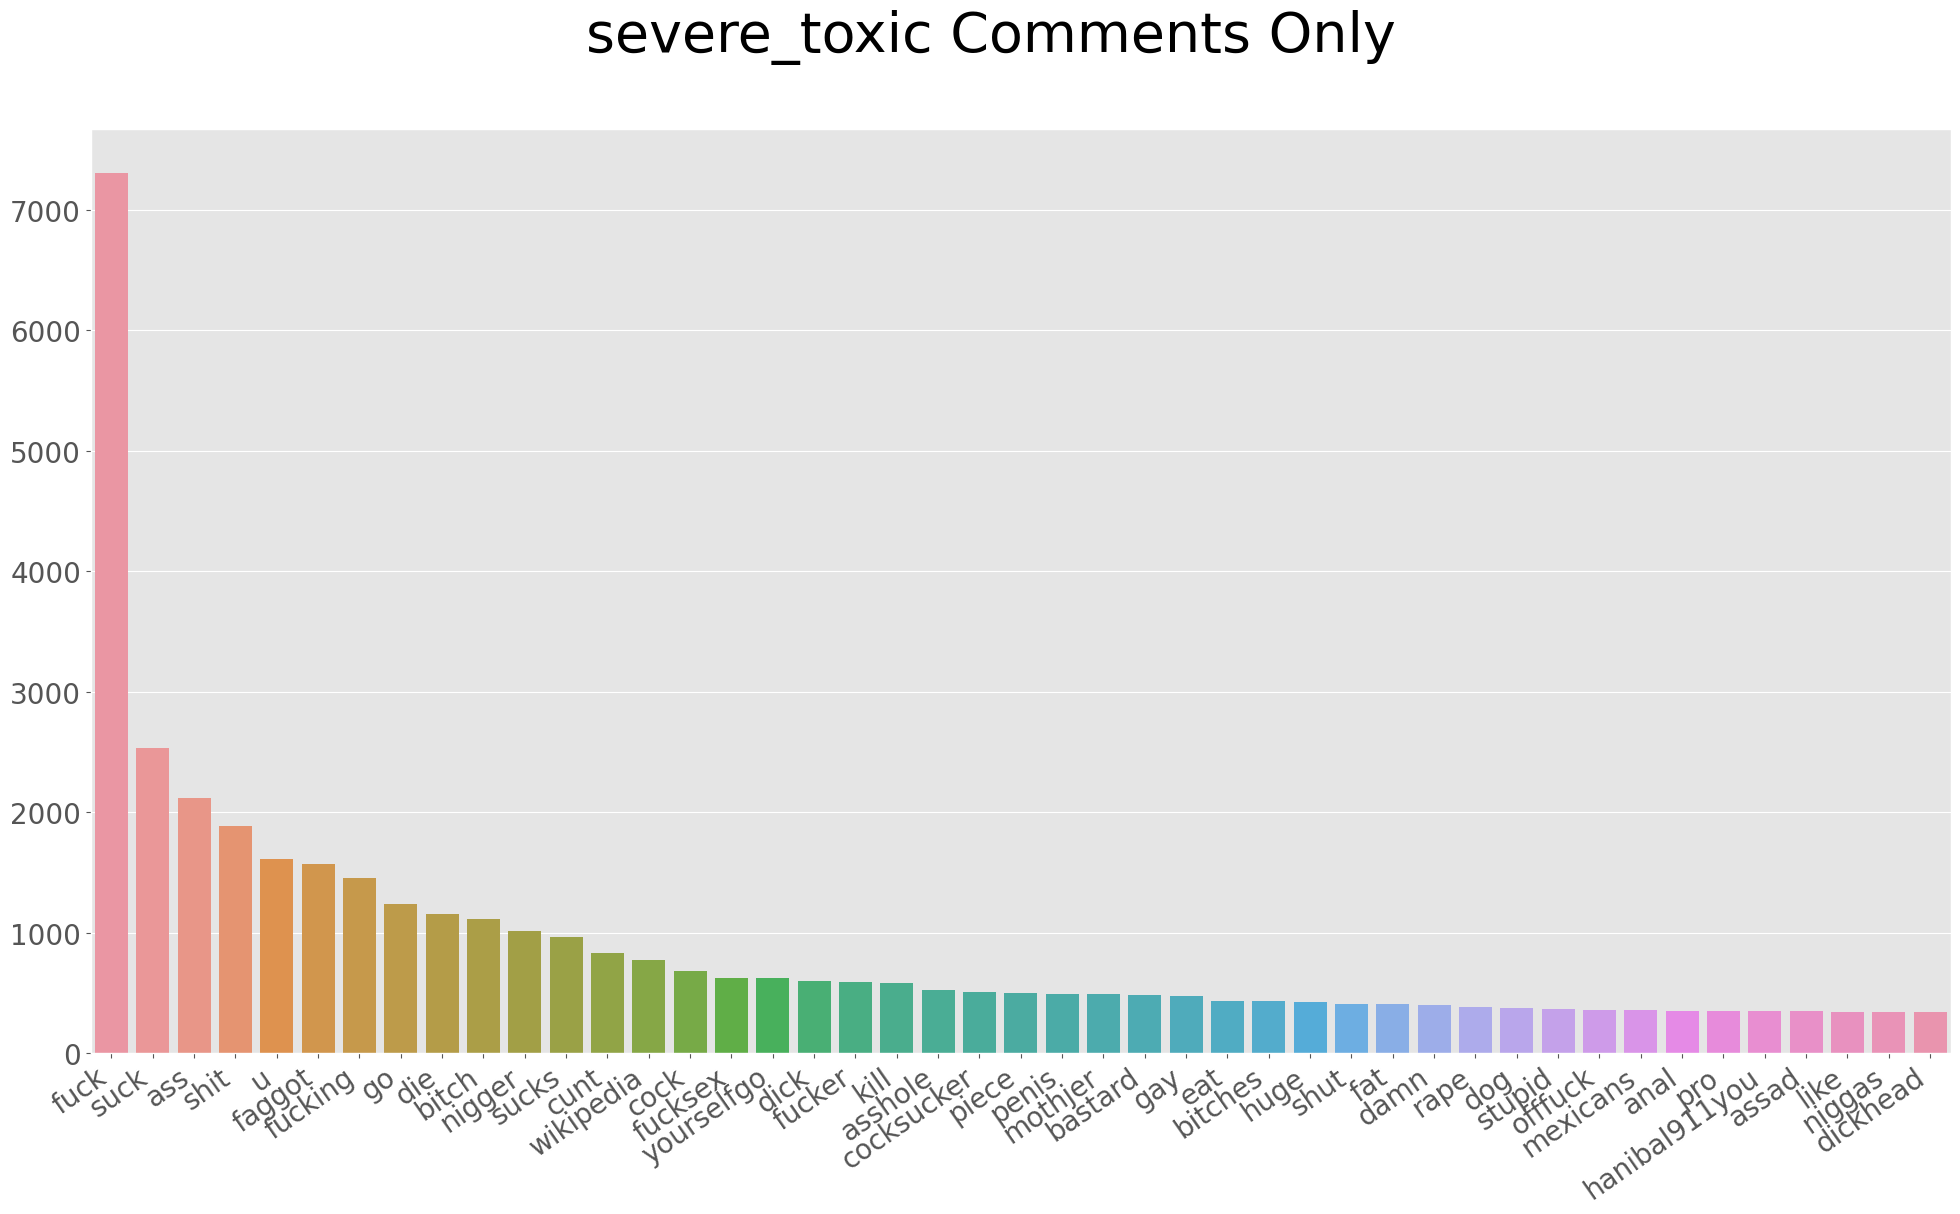

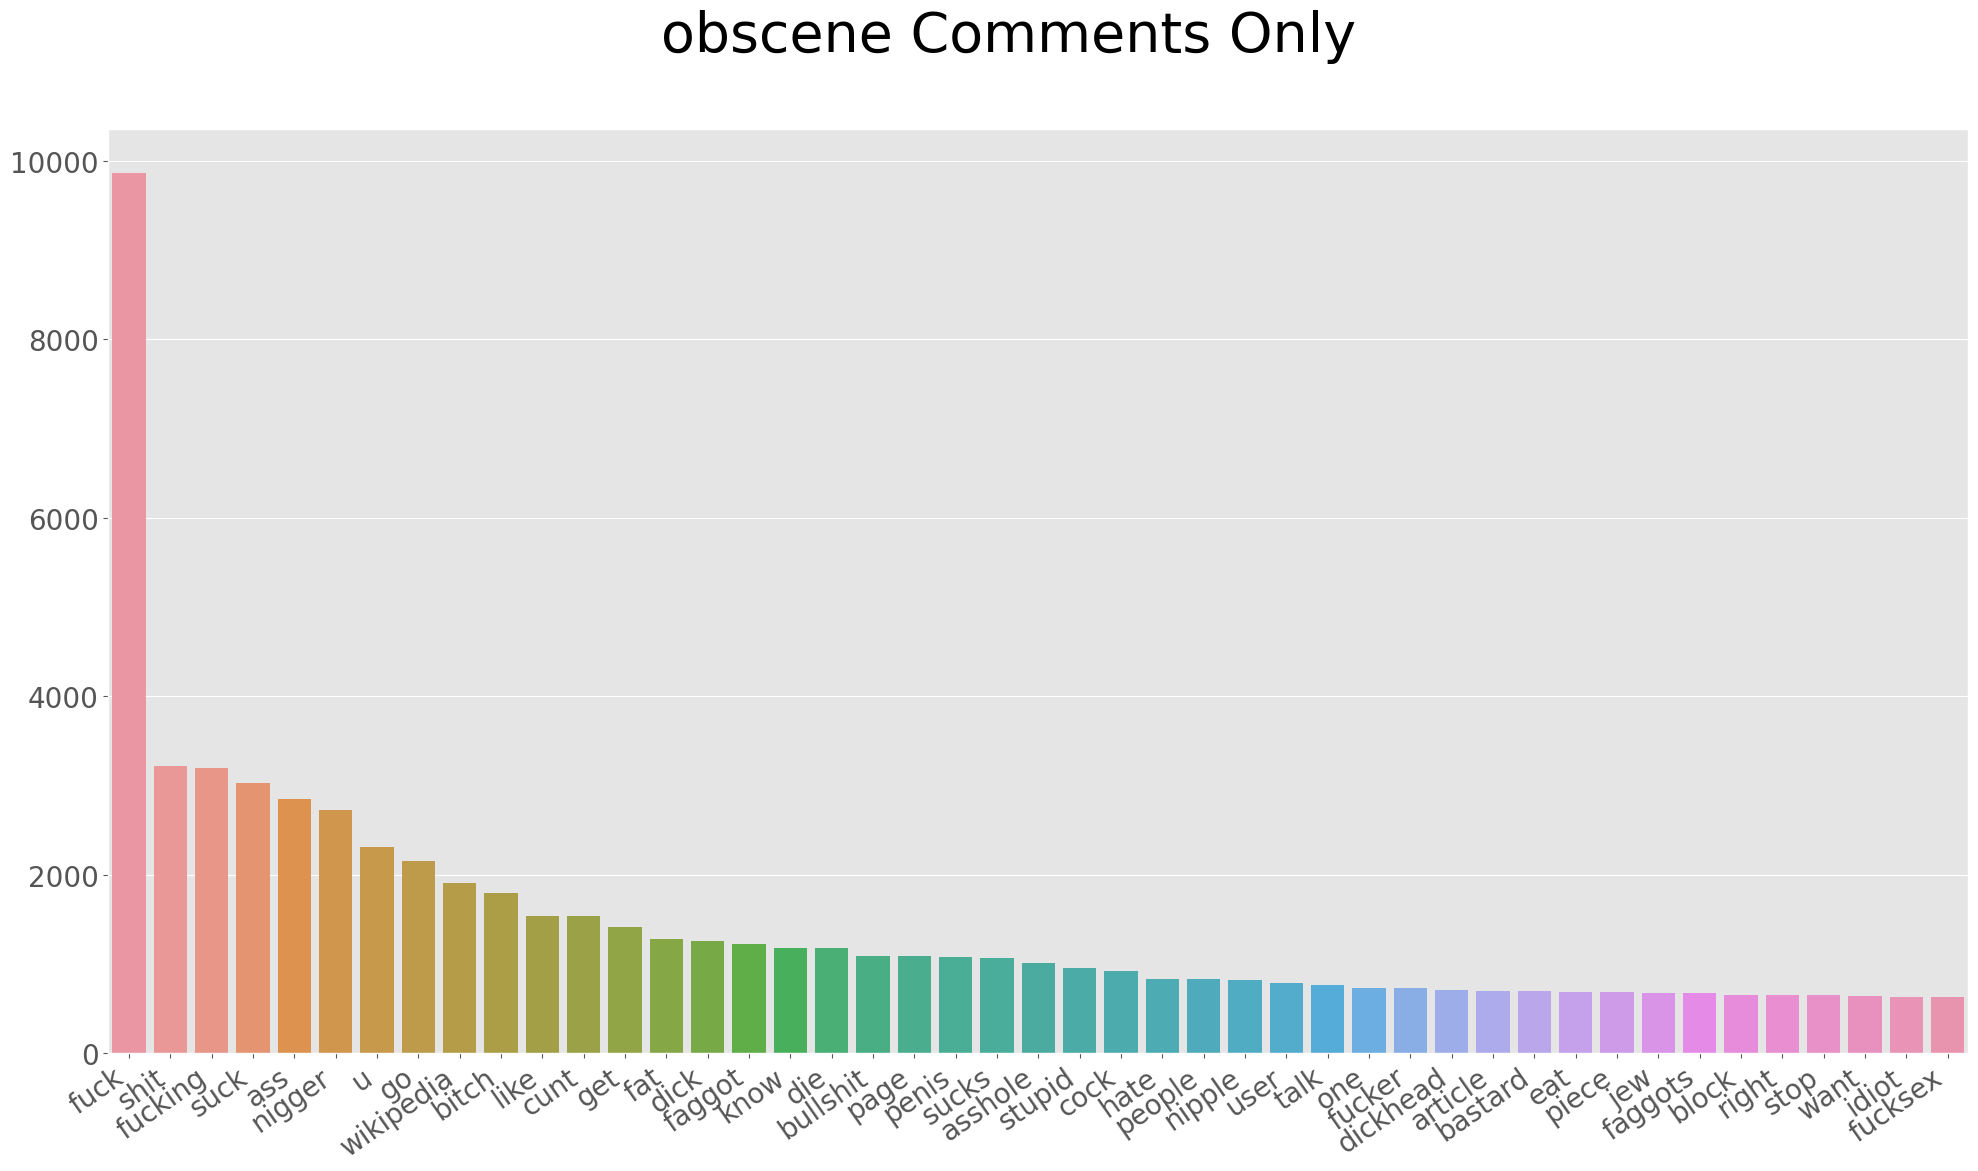

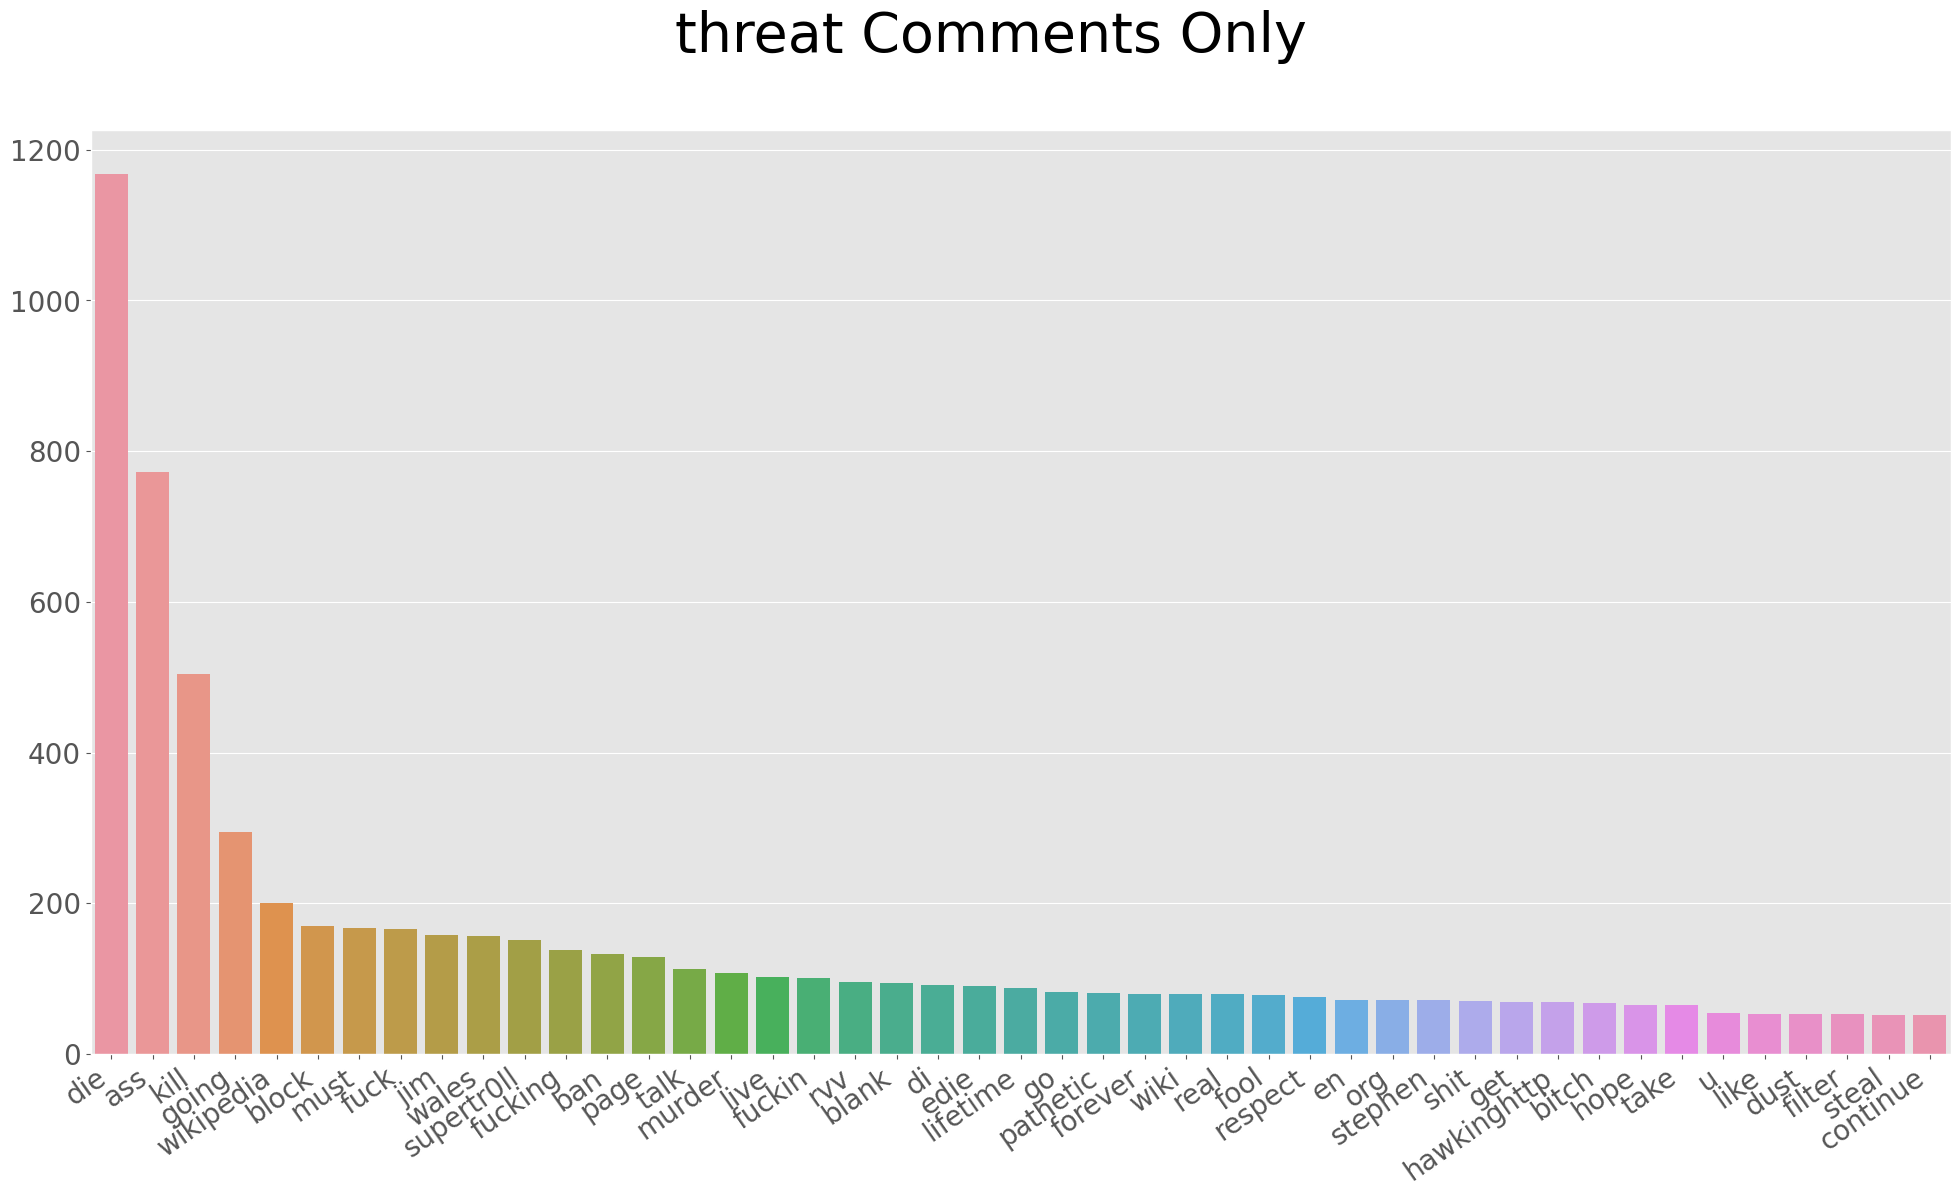

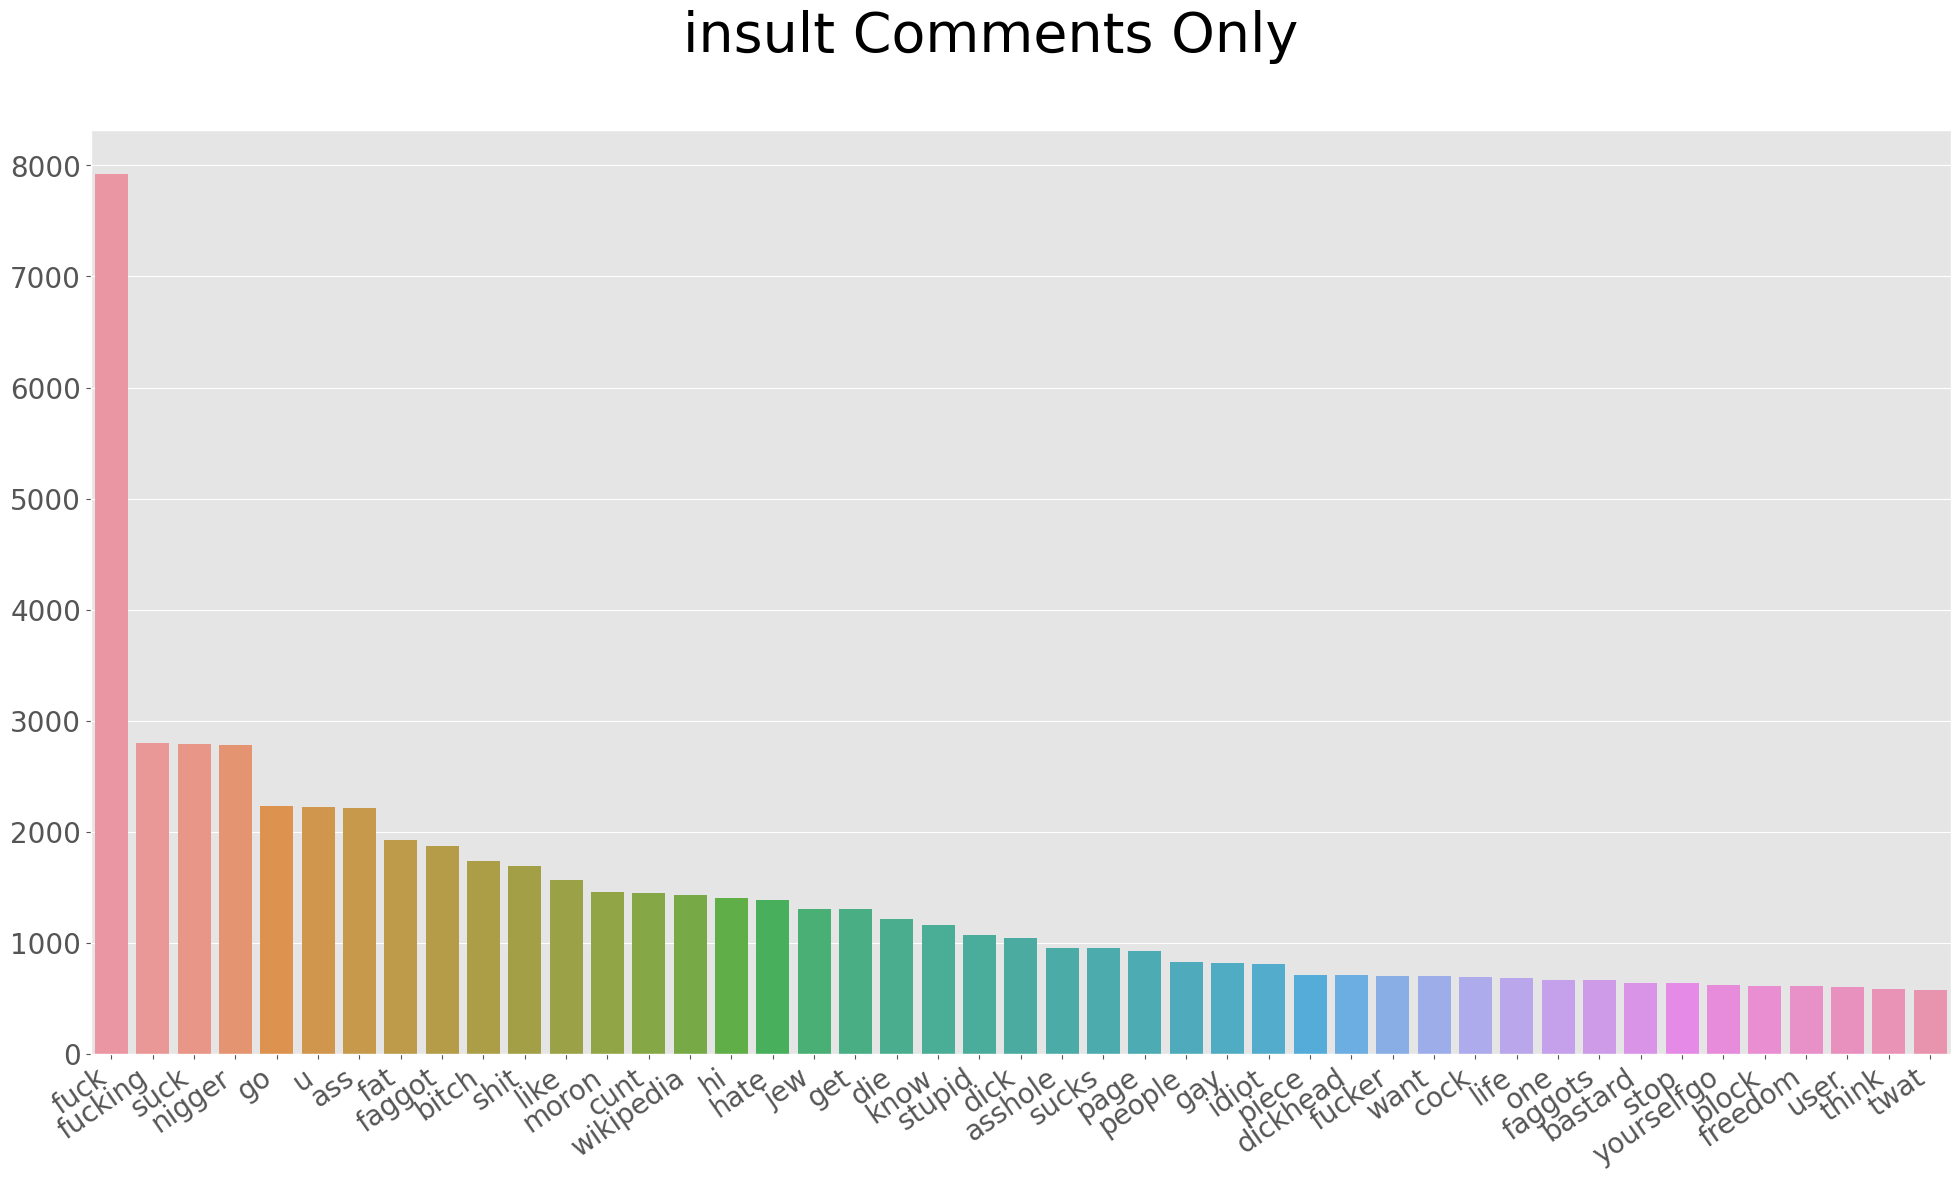

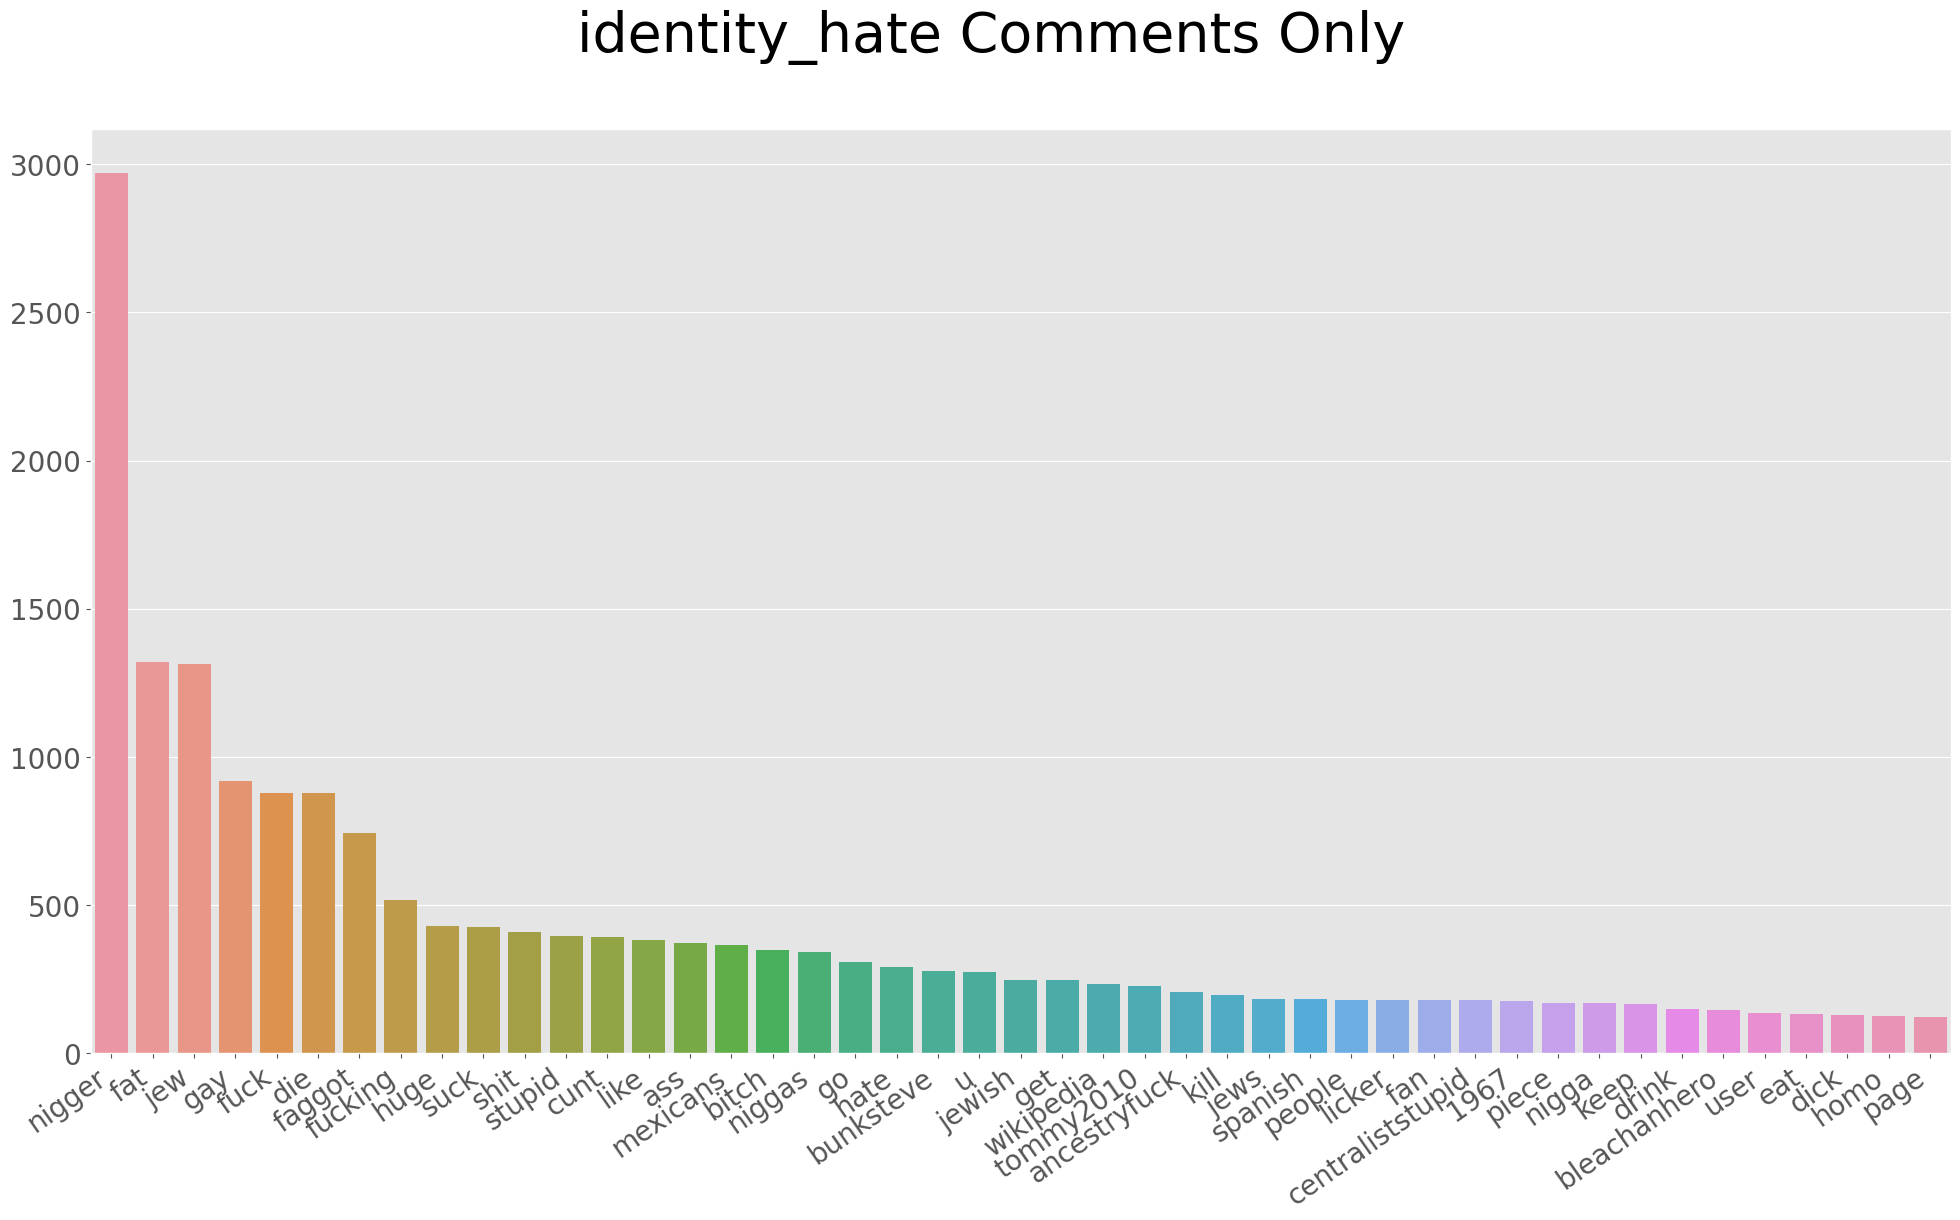

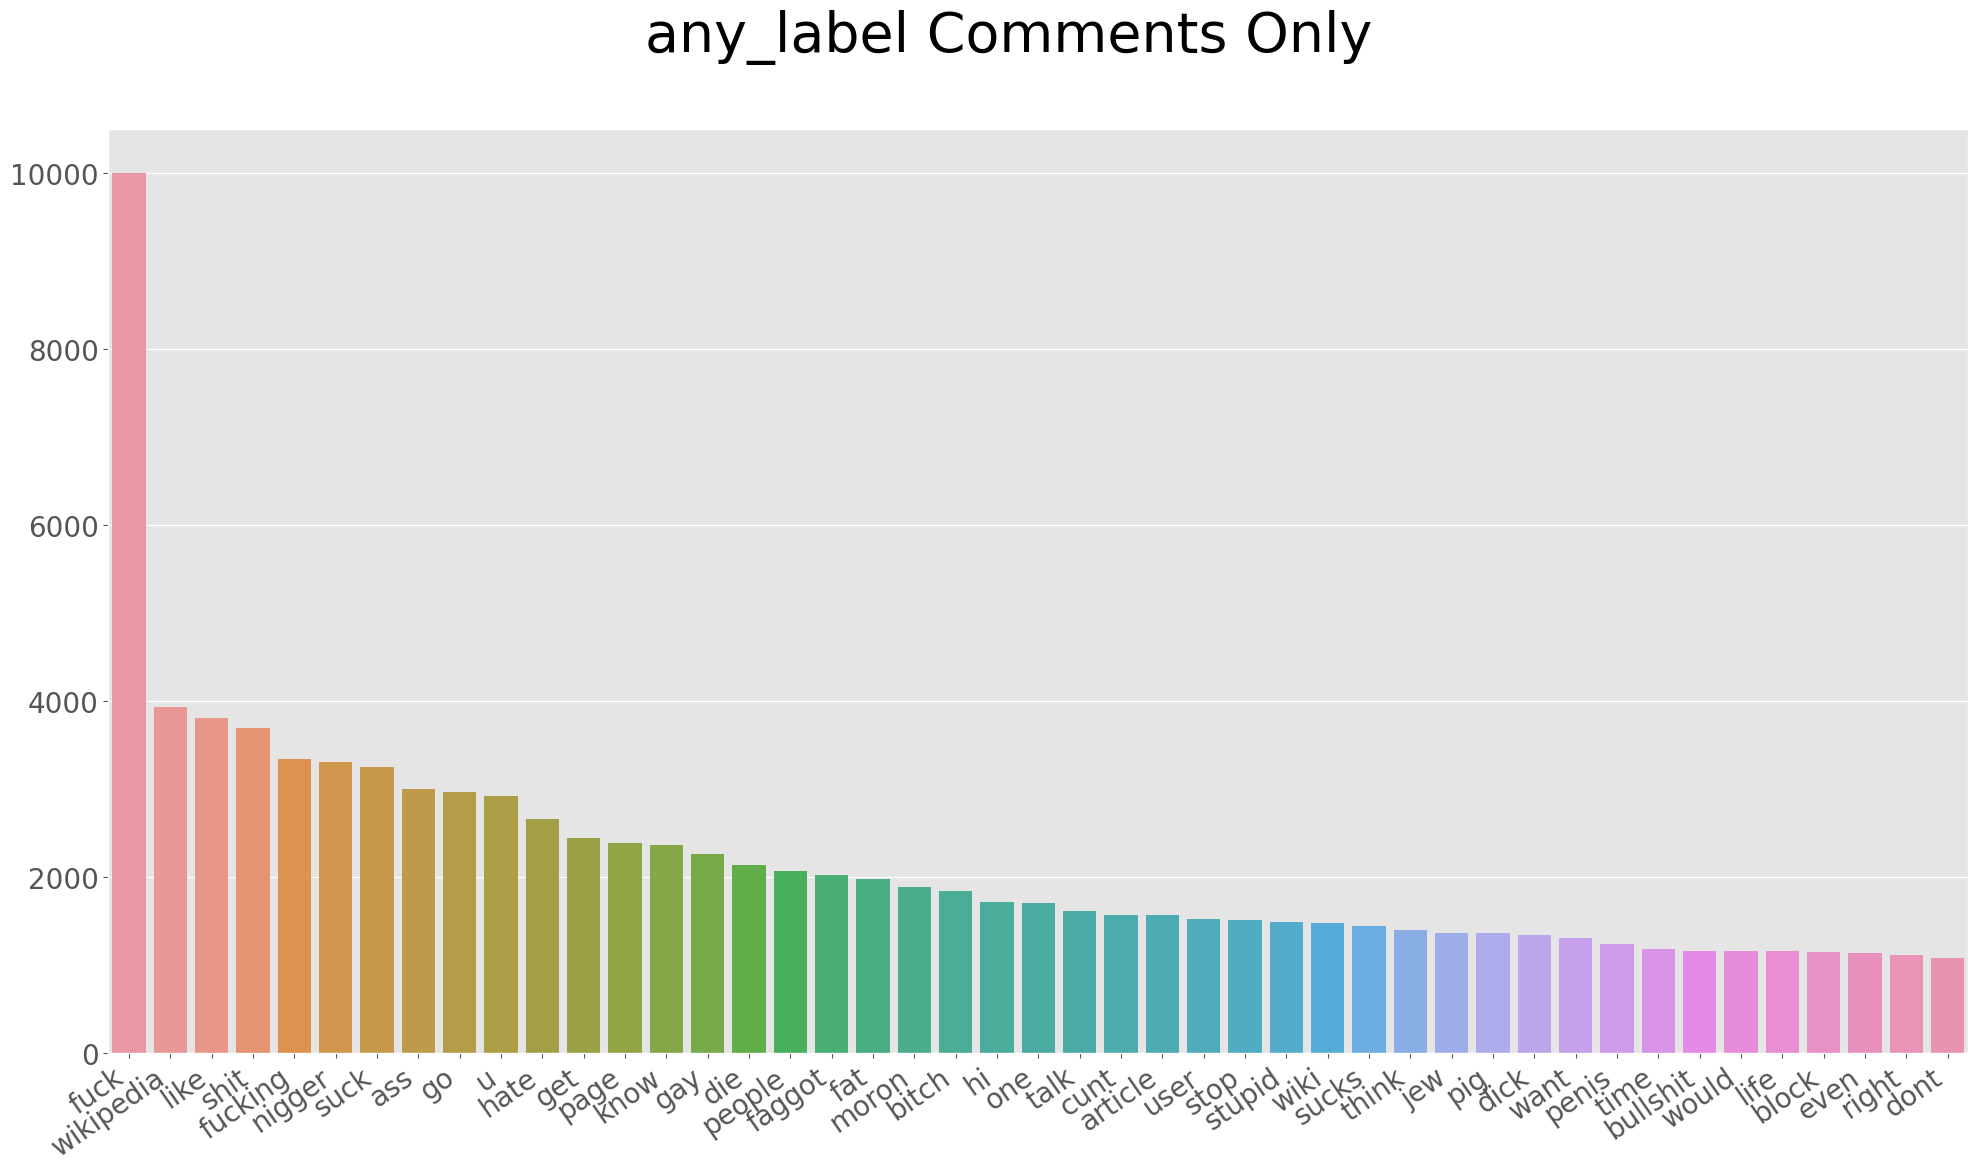

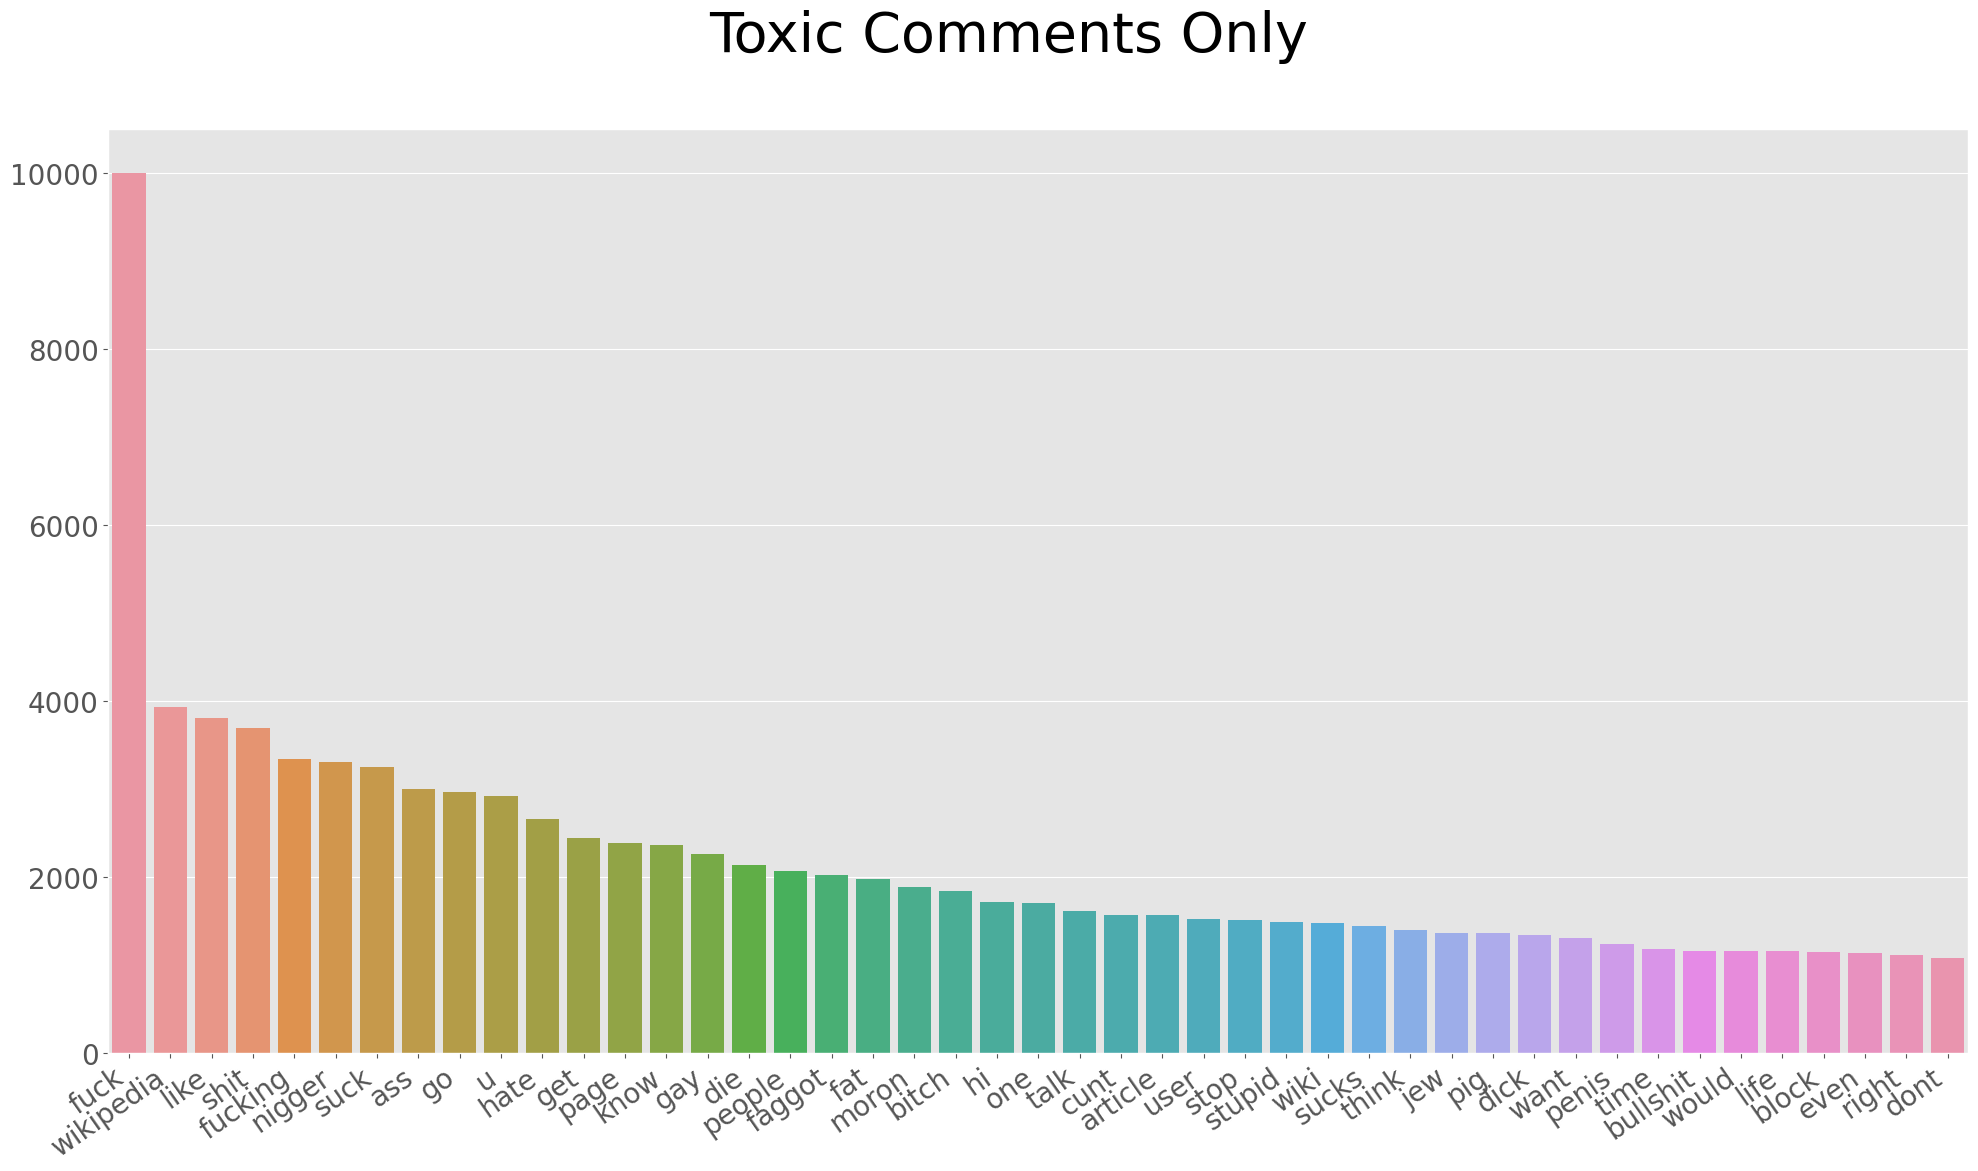

In [167]:
all_tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True)
all_tokenizer.fit_on_texts(train.comment_text[(toxic_rows==0)])
word_plot(get_word_cnt(all_tokenizer), 45, 'Clean Comments Only')

for label in targets:
    toxic_tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True)
    toxic_tokenizer.fit_on_texts(train.comment_text[(train_targets[label]==1)])
    word_plot(get_word_cnt(toxic_tokenizer), 45, label + ' Comments Only')
    
toxic_tokenizer = Tokenizer(filters=string.punctuation+'\n', lower=True)
toxic_tokenizer.fit_on_texts(train.comment_text[toxic_rows])
word_plot(get_word_cnt(toxic_tokenizer), 45, 'Toxic Comments Only')

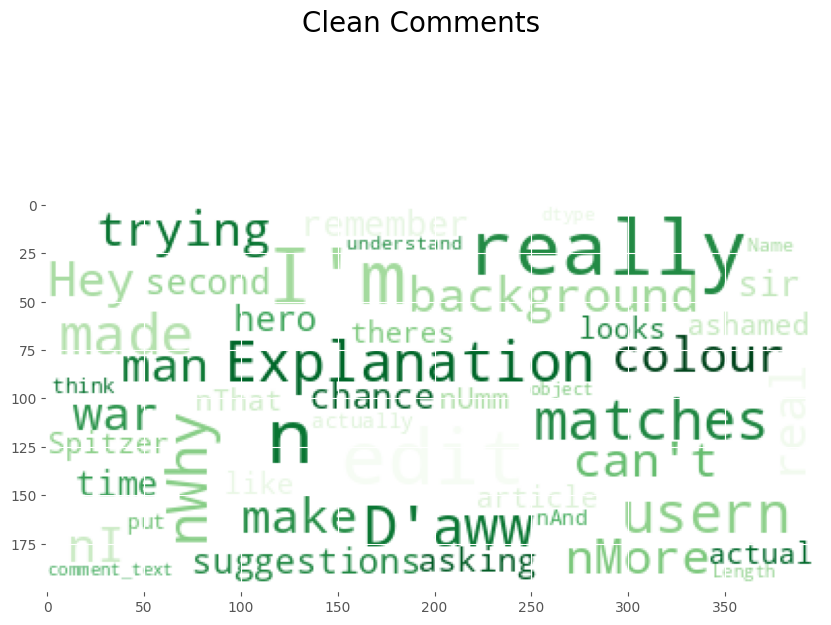

In [178]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color='white',
                      stopwords=set(stopwords.words('english')),
                      max_words=100,
                      max_font_size=40,
                      colormap='Greens'
                         ).generate(str(train.comment_text[(toxic_rows==0)]))
plt.figure('wordcloud', figsize=(10,8))
plt.suptitle('Clean Comments', fontsize=20)
plt.imshow(wordcloud)
# plt.axis('off')
plt.show()



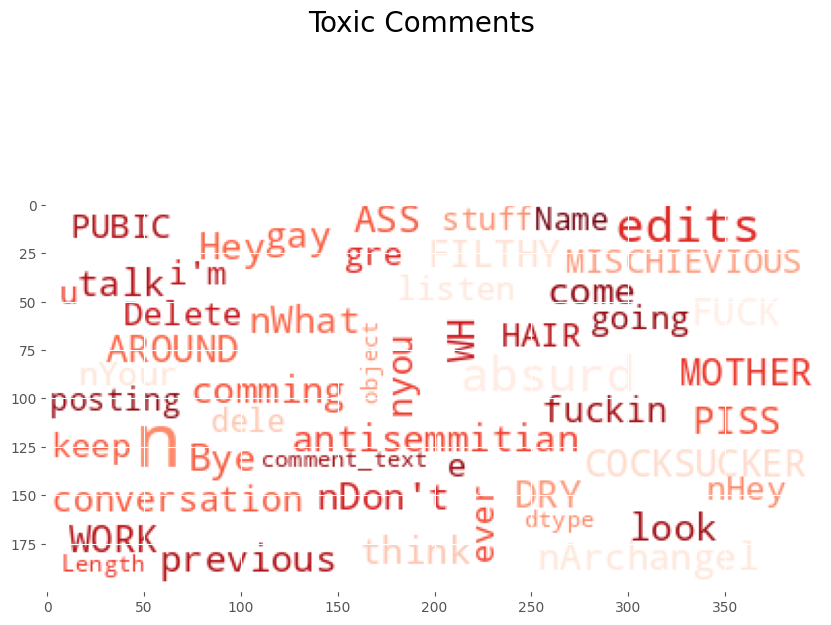

In [179]:
wordcloud = WordCloud(background_color='white',
                      stopwords=set(stopwords.words('english')),
                      max_words=100,
                      max_font_size=40,
                      colormap='Reds'
                         ).generate(str(train.comment_text[toxic_rows]))
plt.figure('toxic_wordcloud', figsize=(10,8))
plt.suptitle('Toxic Comments', fontsize=20)
plt.imshow(wordcloud)
# plt.axis('off')
plt.show()